In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.fftpack import fft,ifft
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}
SIGNALS = [
	"body_acc_x", "body_acc_y", "body_acc_z",
	"total_acc_x", "total_acc_y", "total_acc_z",
	"body_gyro_x", "body_gyro_y", "body_gyro_z",
]
COLORS = ['r', 'g', 'b']

In [2]:
body_acc_x = pd.read_csv('../testData/body_acc_x_test.txt', delim_whitespace=True, header=None).to_numpy()
body_acc_y = pd.read_csv('../testData/body_acc_y_test.txt', delim_whitespace=True, header=None).to_numpy()
body_acc_z = pd.read_csv('../testData/body_acc_z_test.txt', delim_whitespace=True, header=None).to_numpy()
total_acc_x = pd.read_csv('../testData/total_acc_x_test.txt', delim_whitespace=True, header=None).to_numpy()
total_acc_y = pd.read_csv('../testData/total_acc_y_test.txt', delim_whitespace=True, header=None).to_numpy()
total_acc_z = pd.read_csv('../testData/total_acc_z_test.txt', delim_whitespace=True, header=None).to_numpy()
body_gyro_x = pd.read_csv('../testData/body_gyro_x_test.txt', delim_whitespace=True, header=None).to_numpy()
body_gyro_y = pd.read_csv('../testData/body_gyro_y_test.txt', delim_whitespace=True, header=None).to_numpy()
body_gyro_z = pd.read_csv('../testData/body_gyro_z_test.txt', delim_whitespace=True, header=None).to_numpy()
y = pd.read_csv('../testData/y_test.txt', delim_whitespace=True, header=None).to_numpy()

In [110]:
def showplot(size, data):
    
    plt.subplots_adjust(bottom=1, top=3, left=1, right=3)
    
    for signal in range(9):
        plt.subplot(331+signal)
        plt.title(SIGNALS[signal])
        for int in range(size):plt.plot(data[int][signal])
            
    plt.show()
    
def showcompare(before, after):
    # walking / upstairs / downstairs
    print('walking(R) / upstairs(G) / downstairs(B)')
    plt.subplots_adjust(bottom=1, top=3, left=1, right=3)
    for signal in range(9):
        plt.subplot(331+signal)
        plt.title(SIGNALS[signal])
        for int in range(3):plt.plot(before[int][signal], COLORS[int])
    plt.show()
    plt.clf()
    plt.subplots_adjust(bottom=1, top=3, left=1, right=3)
    for signal in range(9):
        plt.subplot(331+signal)
        plt.title(SIGNALS[signal])
        for int in range(3):plt.plot(after[int][signal], COLORS[int]) 
    plt.show()
    plt.clf()
    
    # sitting / standing / laying
    print('sitting(R) / standing(G) / laying(B)')
    plt.subplots_adjust(bottom=1, top=3, left=1, right=3)
    for signal in range(9):
        plt.subplot(331+signal)
        plt.title(SIGNALS[signal])
        for int in range(3):plt.plot(before[int][signal], COLORS[int]) 
    plt.show()
    plt.clf()
    plt.subplots_adjust(bottom=1, top=3, left=1, right=3)
    for signal in range(9):
        plt.subplot(331+signal)
        plt.title(SIGNALS[signal])
        for int in range(3):plt.plot(after[int+3][signal], COLORS[int])
    plt.show()
    plt.clf()
    
    # walking / standing
    print('walking(R) / standing(G)')
    plt.subplots_adjust(bottom=1, top=3, left=1, right=3)
    for signal in range(9):
        plt.subplot(331+signal)
        plt.title(SIGNALS[signal])
        plt.plot(before[0][signal], COLORS[0])
        plt.plot(before[4][signal], COLORS[1])
    plt.show()
    plt.clf()
    plt.subplots_adjust(bottom=1, top=3, left=1, right=3)
    for signal in range(9):
        plt.subplot(331+signal)
        plt.title(SIGNALS[signal])
        plt.plot(after[0][signal], COLORS[0])
        plt.plot(after[4][signal], COLORS[1])
    plt.show()

Activity:  WALKING


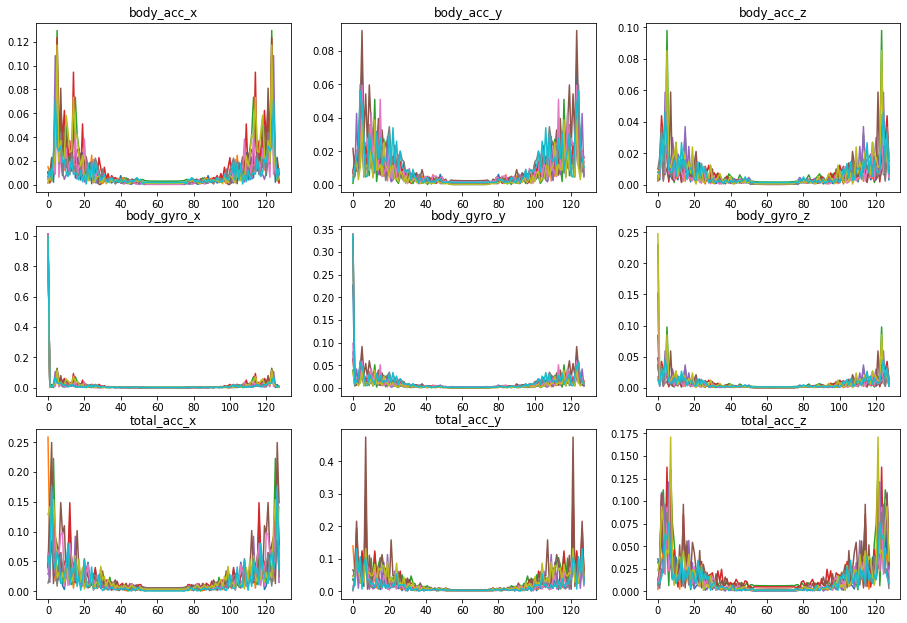

Activity:  WALKING_UPSTAIRS


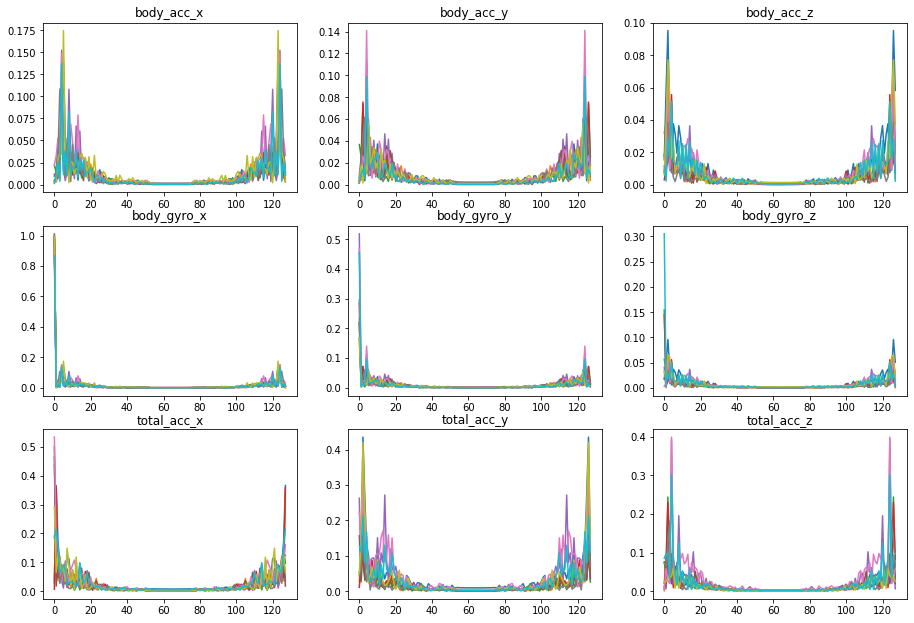

Activity:  WALKING_DOWNSTAIRS


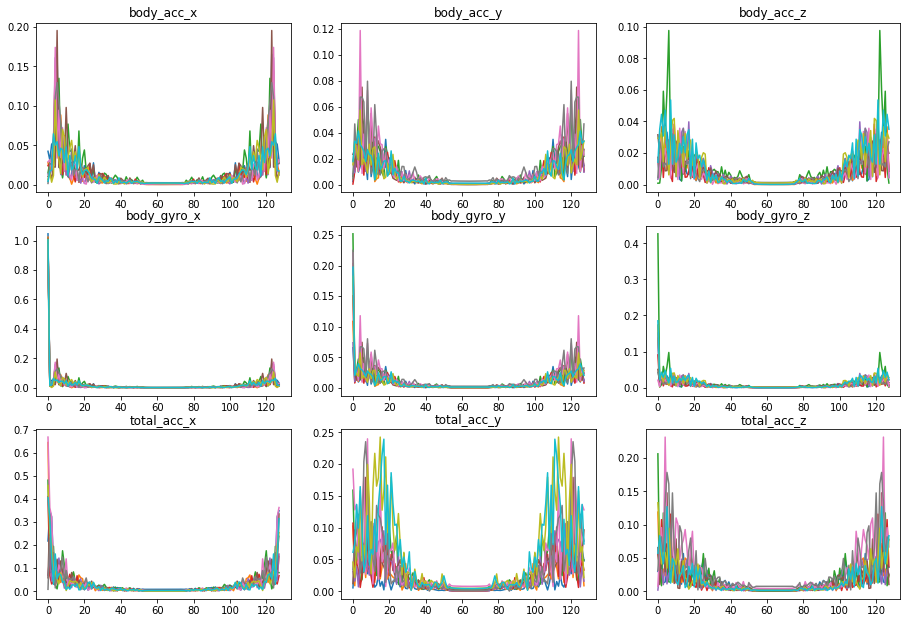

Activity:  SITTING


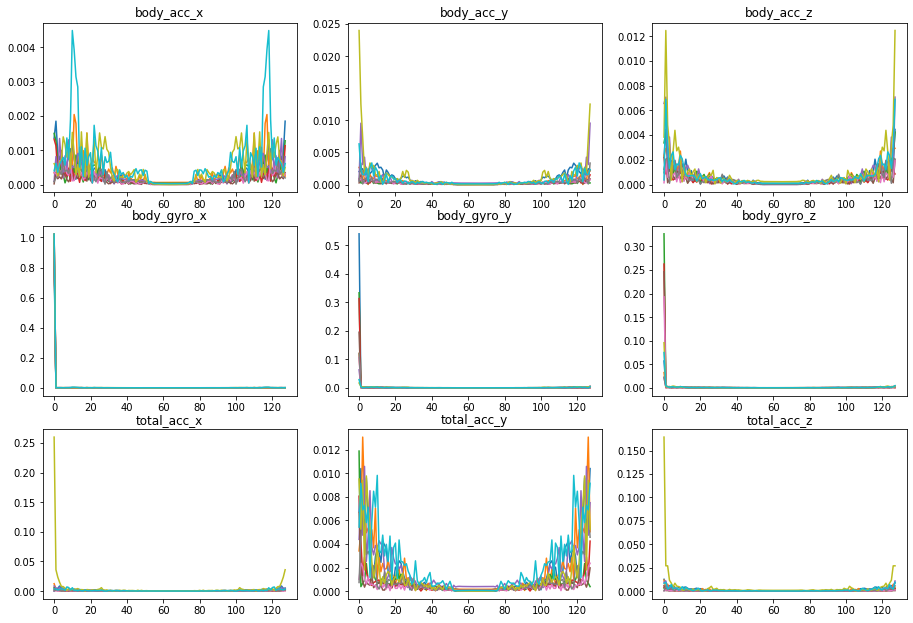

Activity:  STANDING


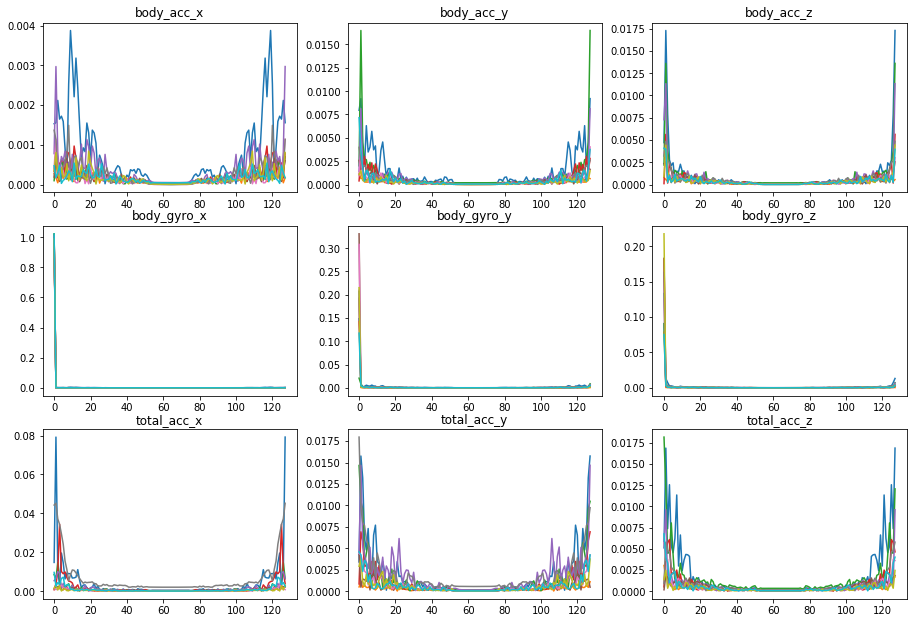

Activity:  LAYING


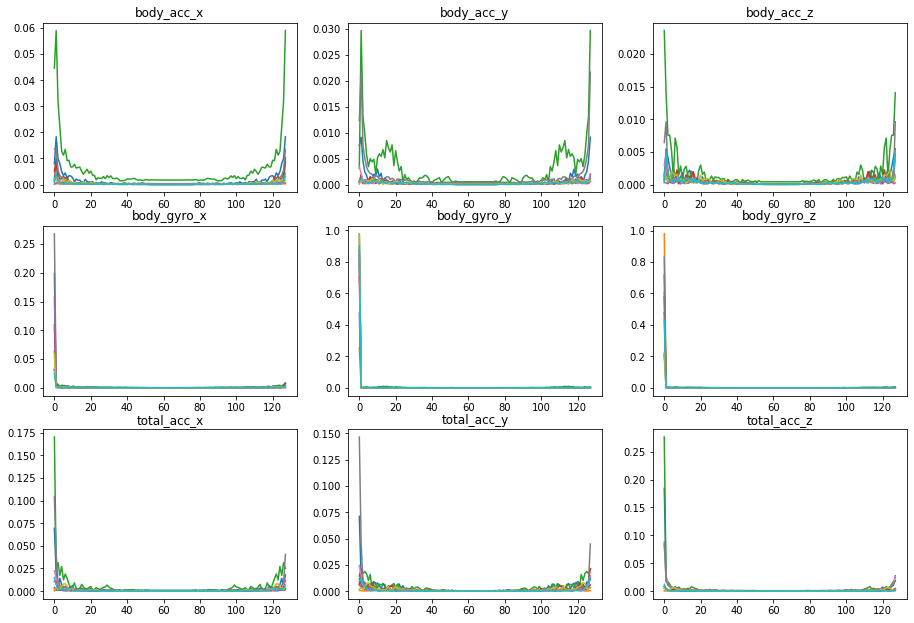

In [11]:
size = 10
for step in range(6):
    before = []
    after = []
    for sample in range(size):
        index = random.randint(0,2946)
        target = y[index][0]
        while (target!=step+1):
            index = random.randint(0,2946)
            target = y[index][0]

        list = [body_acc_x[index], body_acc_y[index], body_acc_z[index],
                total_acc_x[index], total_acc_y[index], total_acc_z[index],
                body_gyro_x[index], body_gyro_y[index], body_gyro_z[index]]
        before.append(np.array(list))
        list = [abs(fft(body_acc_x)[index])/128, abs(fft(body_acc_y)[index])/128, abs(fft(body_acc_z)[index])/128,
                abs(fft(total_acc_x[index]))/128, abs(fft(total_acc_y[index]))/128, abs(fft(total_acc_z[index]))/128,
                abs(fft(body_gyro_x[index]))/128, abs(fft(body_gyro_y[index]))/128, abs(fft(body_gyro_z[index]))/128]
        after.append(np.array(list))
        
        if (sample==0):
            compare.append(np.array(list))
        
    print('Activity: ', ACTIVITIES[target-1])
#     print('before FFT')
#     showplot(size, before)
#     print('after FFT')
    showplot(size, after)

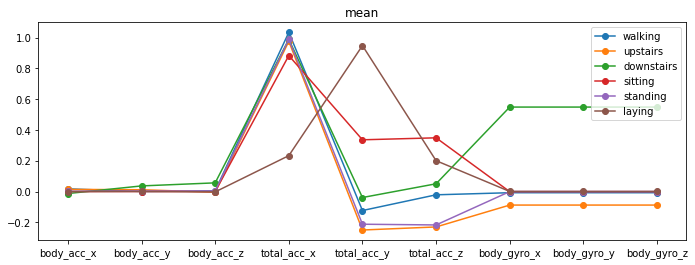

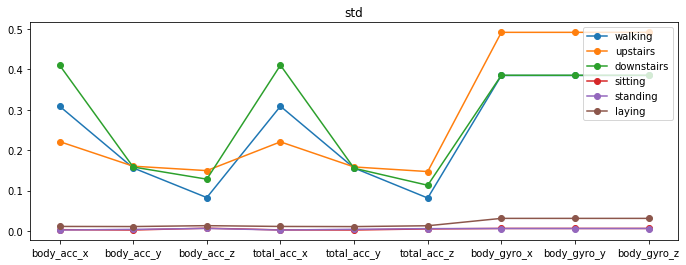

walking(R) / upstairs(G) / downstairs(B)


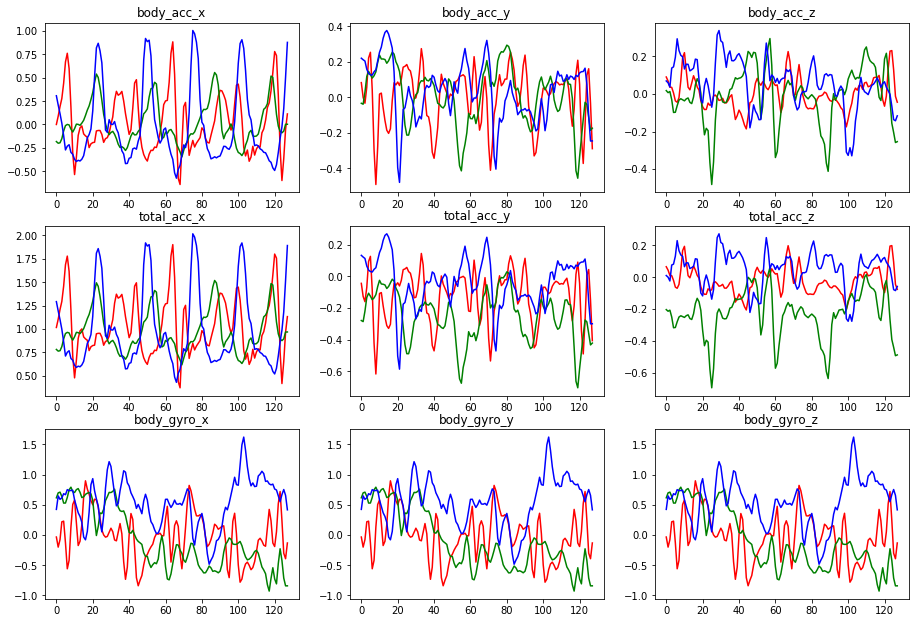

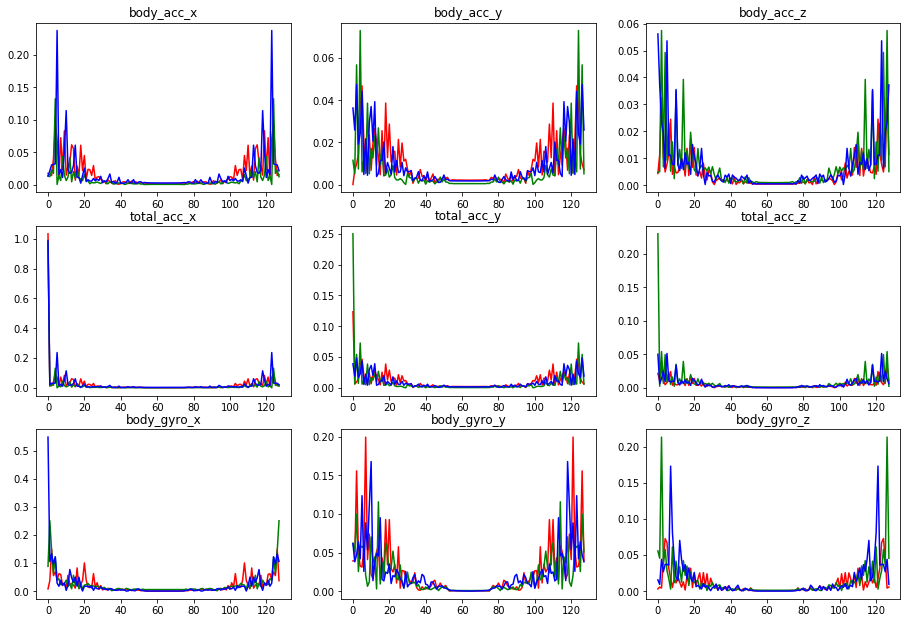

sitting(R) / standing(G) / laying(B)


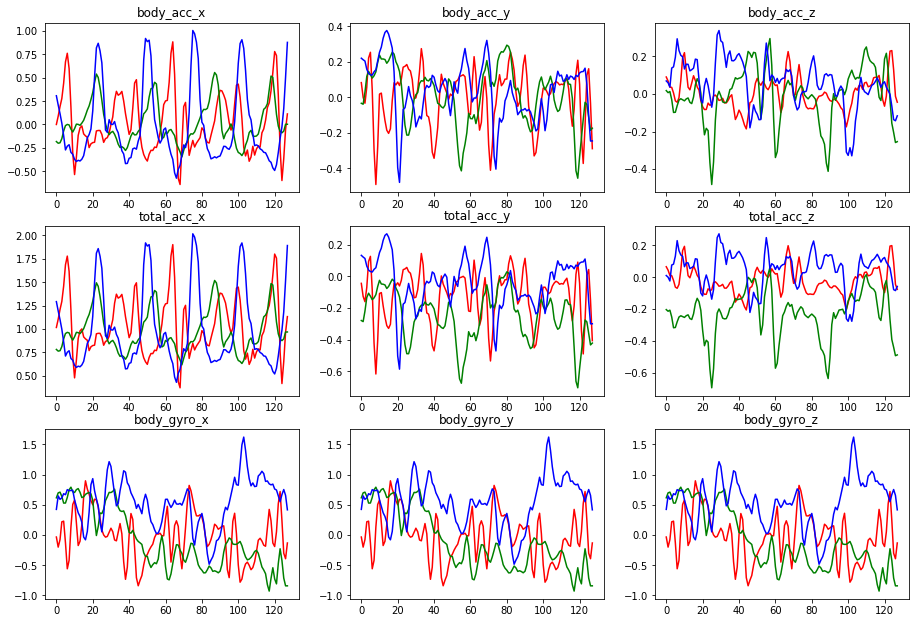

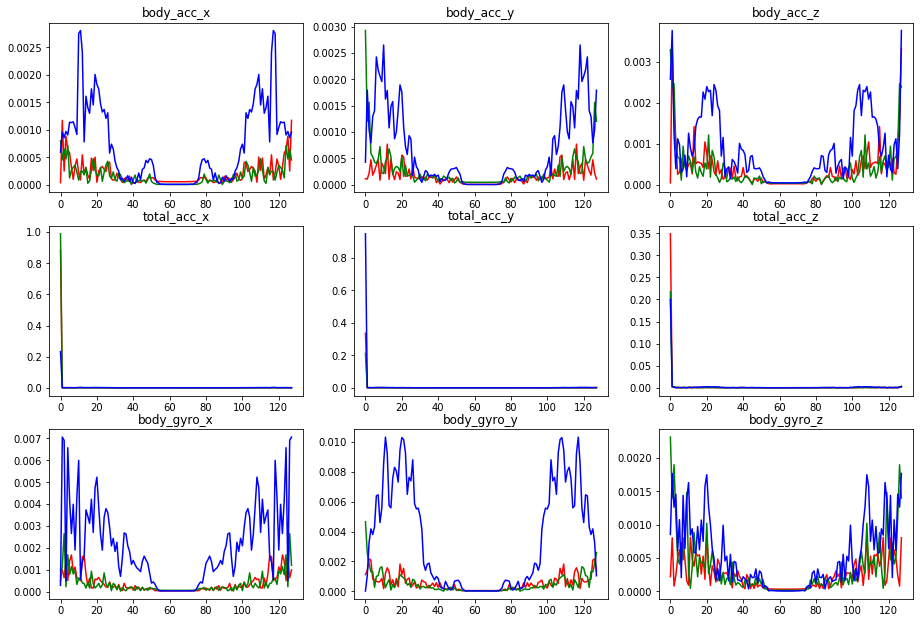

walking(R) / standing(G)


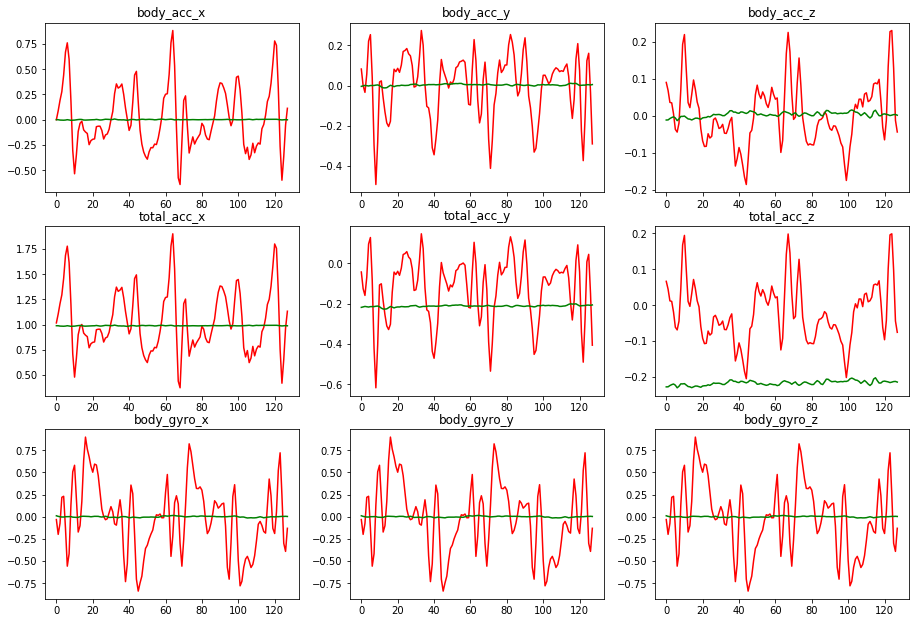

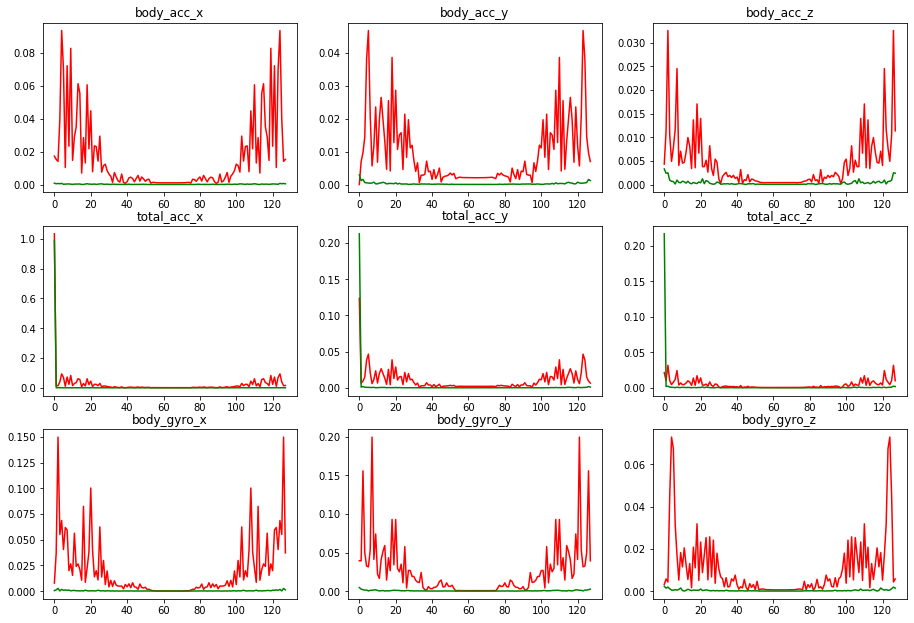

In [291]:
before = []
after = []
mean = np.empty(shape=(6,9))
std = np.empty(shape=(6,9))
for step in range(6):
    index = random.randint(0,2946)
    target = y[index][0]
    while (target!=step+1):
        index = random.randint(0,2946)
        target = y[index][0]
    mean[step] = [np.mean(body_acc_x[index]), np.mean(body_acc_y[index]), np.mean(body_acc_z[index]),
                 np.mean(total_acc_x[index]), np.mean(total_acc_y[index]), np.mean(total_acc_z[index]),
                 np.mean(body_gyro_x[index]), np.mean(body_gyro_x[index]), np.mean(body_gyro_x[index])]
    std[step] = [np.std(body_acc_x[index]), np.std(body_acc_y[index]), np.std(body_acc_z[index]),
                 np.std(total_acc_x[index]), np.std(total_acc_y[index]), np.std(total_acc_z[index]),
                 np.std(body_gyro_x[index]), np.std(body_gyro_x[index]), np.std(body_gyro_x[index])]
    
    list = [body_acc_x[index], body_acc_y[index], body_acc_z[index],
            total_acc_x[index], total_acc_y[index], total_acc_z[index],
            body_gyro_x[index], body_gyro_x[index], body_gyro_x[index]]
    before.append(np.array(list))
    
    list = [abs(fft(body_acc_x)[index])/128, abs(fft(body_acc_y)[index])/128, abs(fft(body_acc_z)[index])/128,
            abs(fft(total_acc_x[index]))/128, abs(fft(total_acc_y[index]))/128, abs(fft(total_acc_z[index]))/128,
            abs(fft(body_gyro_x[index]))/128, abs(fft(body_gyro_y[index]))/128, abs(fft(body_gyro_z[index]))/128]
    after.append(np.array(list))
# print(mean)
plt.subplots_adjust(left=1, right=2.5)
for int in range(6): plt.plot(mean[int], 'o-')
plt.xticks(np.arange(0,9,step=1),SIGNALS)
plt.legend(['walking', 'upstairs', 'downstairs', 'sitting', 'standing', 'laying'], loc='upper right')
plt.title('mean')
plt.show()
plt.clf()

# print(std)
plt.subplots_adjust(left=1, right=2.5)
for int in range(6): plt.plot(std[int], 'o-')
plt.xticks(np.arange(0,9,step=1),SIGNALS)
plt.legend(['walking', 'upstairs', 'downstairs', 'sitting', 'standing', 'laying'], loc='upper right')
plt.title('std')
plt.show()
plt.clf()

showcompare(before, after)

In [258]:
body_acc_x = pd.read_csv('../testData/body_acc_x_test.txt', delim_whitespace=True, header=None).to_numpy()
y = pd.read_csv('../testData/y_test.txt', delim_whitespace=True, header=None).to_numpy()

WALKING


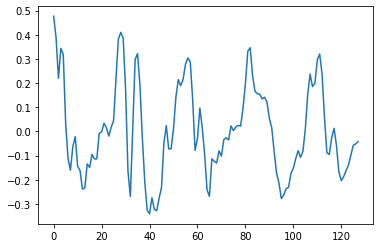

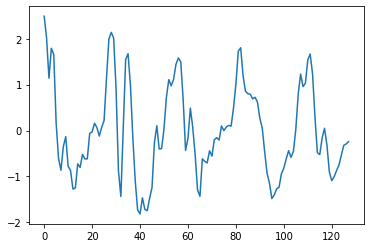

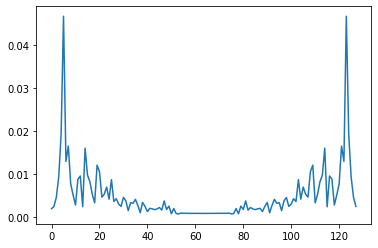

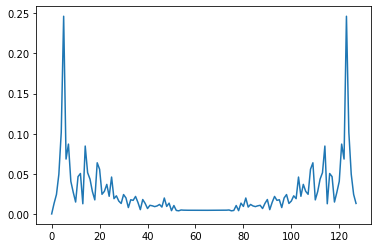

In [290]:
index = random.randint(0,1738)
print(ACTIVITIES[y[index][0]-1])
mean = np.mean(body_acc_x[index])
std = np.std(body_acc_x[index])
norm = (body_acc_x[index]-mean)/std
plt.plot(body_acc_x[index])
plt.show()
plt.clf()
plt.plot(norm)
plt.show()
plt.clf()
plt.plot(abs(fft(body_acc_x[index]))/256)
plt.show()
plt.clf()
plt.plot(abs(fft(norm))/256)
plt.show()